# **Assignment 10**

In [3]:
# core
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# ml
from sklearn import datasets as ds
from sklearn import linear_model as lm
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split as tts

#plotly or other graphing library

In [20]:
# Load datasets here once and assign to variables iris and boston
# EDIT: Due to the nature of the Boston dataset - please only complete questions 1-4 regarding the Iris dataset.  

In [ ]:
# Load the iris set 

iris = ds.load_iris()

# Create a data frame of the iris data set

iris_df = pd.DataFrame(iris.data)
iris_df['class'] = iris.target
iris_df.columns = ['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
iris_df.dropna(how="all", inplace=True)

**Q1** 

**Data set: Iris**

* Return the first 5 rows of the data including the feature names as column headings in a DataFrame and a
separate Python list containing target names

In [88]:
# First five rows

iris_df.head()

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [71]:
# target list
iris_target_names = list(iris.target_names)
iris_target_names 

['setosa', 'versicolor', 'virginica']

**Q2**

**Data set: Iris**

* Fit the Iris dataset into a KNN model with neighbors = 5 and predict the category of observations passed in 
argument new_observations. Return back the target names of each prediction (and not their encoded values,
 i.e. return setosa instead of 0).

In [91]:
X = iris_df[["sepal_len", "sepal_wid", "petal_len", "petal_wid"]].values
y = iris_df["class"].values

# Create a KNN classifier with 6 neighbors
knn = KNN(n_neighbors=5)

# Fit the classifier to the data

knn.fit(X, y)

# Create new X values a list of lists containing the values for sepal_len, sepal_wid, petal_len, petal_wid

new_observations = np.array([[5.2, 3.1,1.2,1],
                  [6.7,3.0,4.1,2.9],
                  [4.9,3.9,1.0,0.3]])

# Predict the labels for the X_new
y_pred = knn.predict(new_observations)

# Print the predictions
prediction_list = []
for value in y_pred:
    if value == 0: 
        prediction_list.append("setosa")
    elif value == 1:
        prediction_list.append("versicolor")
    else:
        prediction_list.append("virginica")
        
print("Predictions: {}".format(prediction_list)) 

Predictions: ['setosa', 'virginica', 'setosa']


**Q3** 15 pts

**Data set: Iris**

* Split the Iris dataset into a train / test model with the split ratio between the two established by the function parameter split.

* Fit KNN with the training data with number of neighbors equal to the function parameter neighbors

* Generate and return back an accuracy score using the test data that was split out

In [101]:
X = iris_df[["sepal_len", "sepal_wid", "petal_len", "petal_wid"]].values
y = iris_df["class"].values

# Split into training and test sets
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=42, stratify=y)
knn = KNN(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

1.0


**Q4**

**Data set: Iris**

* Generate an overfitting / underfitting curve of kNN each of the testing and training accuracy performance scores series for a range of neighbor (k) values from 1 to 30 and plot the curves (number of neighbors is x-axis, performance score is y-axis on the chart).

In [103]:
# Create neighbors
neighbors = np.arange(1, 30)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:

# Set up a KNN classifier
    knn = KNN(n_neighbors=neighbor)
    
# Fit the model
    knn.fit(X_train, y_train)
    
#Compute accuracy
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)
    #print(neighbors, '\n', train_accuracies, '\n', test_accuracies)

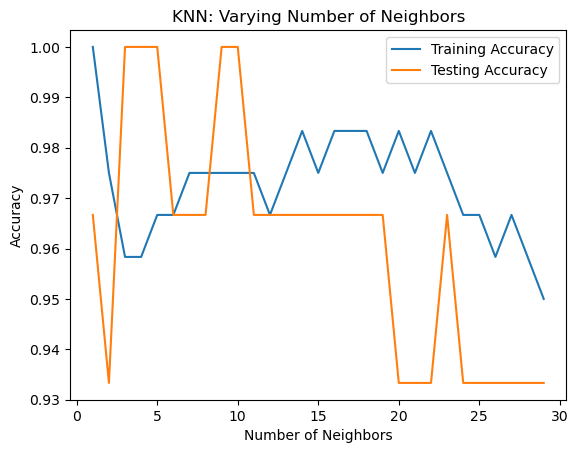

In [104]:
# Visualizing model complexity
import matplotlib.pyplot as plt

# Add a title
plt.title("KNN: Varying Number of Neighbors")

# Plot training accuracies
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")

# Plot test accuracies
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

# Display the plot
plt.show()

**Q5** 10 pts

**Data set: Boston**


* Load sklearn's Boston data into a DataFrame (only the data and feature_name as column names)

* Load sklearn's Boston target values into a separate DataFrame

* Return back the average of AGE, average of the target (median value of homes or MEDV), and the target as NumPy values 

In [ ]:
# Load the Boston Data set

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header = None)
data_df = pd.DataFrame(np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]]))
target_df = pd.DataFrame(raw_df.values[1::2, 2])

In [ ]:
data_df.columns = ["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"]
target_df.columns = ["MEDV"]

In [117]:
age_mean = np.array(data_df["AGE"].mean())

In [118]:
medv_mean = np.array(target_df["MEDV"].mean())

In [119]:
medv_np = np.array(target_df["MEDV"])

**Q6** 

**Data set: Boston**

* In the Boston dataset, the feature PTRATIO refers to pupil teacher ratio.

* Using a matplotlib scatter plot, plot MEDV median value of homes as y-axis and PTRATIO as x-axis

* Return back PTRATIO as a NumPy array

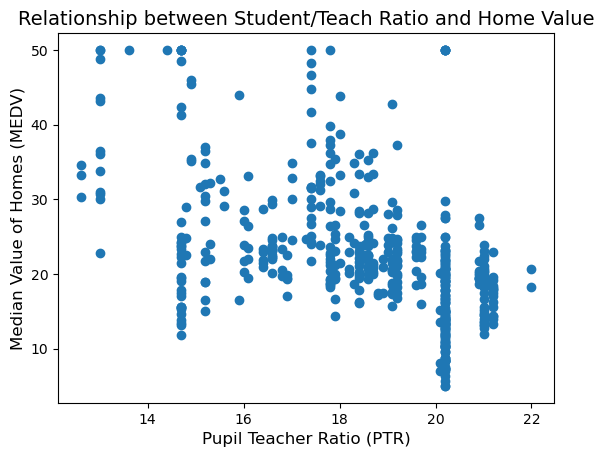

In [116]:
plt.scatter(x = data_df["PTRATIO"], y = target_df["MEDV"])
plt.xlabel(xlabel = "Pupil Teacher Ratio (PTR)", fontsize = 12)
plt.ylabel(ylabel = "Median Value of Homes (MEDV)", fontsize = 12)
plt.title("Relationship between Student/Teach Ratio and Home Value", fontsize = 14)

plt.show()

In [120]:
ptratio_np = np.array(data_df["PTRATIO"])

**Q7**

**Data set: Boston**

* Create a regression model for MEDV / PTRATIO and display a chart showing the regression line using matplotlib

* Use np.linspace() to generate prediction X values from min to max PTRATIO

* Return back the regression prediction space and regression predicted values

* Make sure to labels axes appropriately

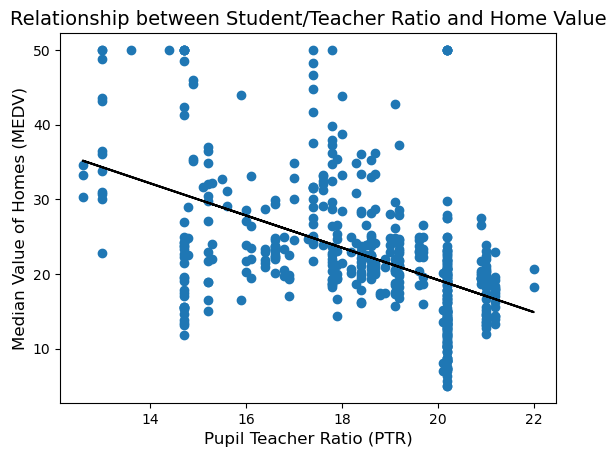

In [123]:
# Create a regression model for MEDV / PTRATIO and display a chart showing the regression line using matplotlib

from sklearn.linear_model import LinearRegression

plt.scatter(x = data_df["PTRATIO"], y = target_df["MEDV"])
plt.xlabel(xlabel = "Pupil Teacher Ratio (PTR)", fontsize = 12)
plt.ylabel(ylabel = "Median Value of Homes (MEDV)", fontsize = 12)
plt.title("Relationship between Student/Teacher Ratio and Home Value", fontsize = 14)

reg = LinearRegression()

ptratio_np = ptratio_np.reshape(-1,1)

reg.fit(ptratio_np, medv_np)
predictions = reg.predict(ptratio_np)

plt.plot(ptratio_np, predictions, color = "black")

plt.show()

In [133]:
prediction_space = np.linspace(predictions.min(), predictions.max())
prediction_space

array([14.88677096, 15.30059643, 15.71442189, 16.12824736, 16.54207282,
       16.95589829, 17.36972375, 17.78354922, 18.19737468, 18.61120015,
       19.02502561, 19.43885108, 19.85267654, 20.26650201, 20.68032747,
       21.09415294, 21.5079784 , 21.92180387, 22.33562933, 22.7494548 ,
       23.16328026, 23.57710573, 23.99093119, 24.40475666, 24.81858212,
       25.23240759, 25.64623305, 26.06005852, 26.47388398, 26.88770945,
       27.30153491, 27.71536038, 28.12918584, 28.54301131, 28.95683677,
       29.37066224, 29.7844877 , 30.19831316, 30.61213863, 31.02596409,
       31.43978956, 31.85361502, 32.26744049, 32.68126595, 33.09509142,
       33.50891688, 33.92274235, 34.33656781, 34.75039328, 35.16421874])

In [134]:
predictions

array([29.33984545, 23.9469072 , 23.9469072 , 22.00544944, 22.00544944,
       22.00544944, 29.55556297, 29.55556297, 29.55556297, 29.55556297,
       29.55556297, 29.55556297, 29.55556297, 17.04394626, 17.04394626,
       17.04394626, 17.04394626, 17.04394626, 17.04394626, 17.04394626,
       17.04394626, 17.04394626, 17.04394626, 17.04394626, 17.04394626,
       17.04394626, 17.04394626, 17.04394626, 17.04394626, 17.04394626,
       17.04394626, 17.04394626, 17.04394626, 17.04394626, 17.04394626,
       20.92686179, 20.92686179, 20.92686179, 20.92686179, 22.86831956,
       22.86831956, 23.73118968, 23.73118968, 23.73118968, 23.73118968,
       23.73118968, 23.73118968, 23.73118968, 23.73118968, 23.73118968,
       26.1040825 , 26.1040825 , 26.1040825 , 26.1040825 , 16.82822873,
       23.73118968, 25.02549485, 29.7712805 , 19.84827414, 19.84827414,
       19.84827414, 19.84827414, 19.84827414, 19.84827414, 22.22116697,
       27.61410521, 27.61410521, 21.57401438, 21.57401438, 21.57